# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Requests
import requests
import time
import json

# Import 
import numpy as np
import pandas as pd
from citipy import citipy
import matplotlib.pyplot as plt

# API Keys
import api_keys

## Generate Cities List

In [ ]:
# Output File (CSV)
output_data_file = "resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# OpenWeatherMap API Key
weather_api_key = "af276f5716516922de2b5eb3a9dc680b"

#create url for query with imperial units and city at the end
#url from https://openweathermap.org/appid
url = "http://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="

# Lists for results
lat = []
lon = []
foundCities = []
temp = []
humidity = []
cloudiness = []
windSpeed = []
date = []
country = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        foundCities.append(city)
        print(f"City processed: {city}")
    except:
        print(f"City NOT found: {city}")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
Weather_DF = pd.DataFrame({"City": foundCities,
                           "Country": country,
                           "Temperature": temp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Windspeed":windSpeed,
                           "Latitude": lat,
                           "Longitude": lon,
                           "Date": date
                          })

Weather_DF.to_csv('city_data_output', index = False)
Weather_DF

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
0,punta arenas,CL,35.71,87,20,19.57,-53.1500,-70.9167,1655680267
1,bethel,US,70.11,39,20,17.27,41.3712,-73.4140,1655680267
2,vila franca do campo,PT,65.19,78,49,14.20,37.7167,-25.4333,1655680267
3,xuddur,SO,70.43,71,35,16.53,4.1213,43.8894,1655680267
4,chuy,UY,47.61,65,74,6.76,-33.6971,-53.4616,1655680268
...,...,...,...,...,...,...,...,...,...
542,vimperk,CZ,74.37,74,54,5.21,49.0586,13.7829,1655680434
543,road town,VG,82.49,74,20,8.05,18.4167,-64.6167,1655680435
544,dorado,PR,83.17,81,20,11.50,18.4588,-66.2677,1655680435
545,lorengau,PG,82.80,68,14,3.65,-2.0226,147.2712,1655680435


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
badHumidityDF = Weather_DF[(Weather_DF['Humidity'] > 100)]
badHumidityDF

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date


In [29]:
#  Get the indices of cities that have humidity over 100%.
badHumidityDF.index

Int64Index([], dtype='int64')

In [33]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

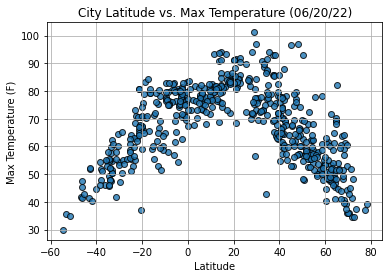

In [43]:
# Latitude vs Weather DFs

# Build scatter plot for latitude vs temperature
plt.scatter(Weather_DF["Latitude"], 
            Weather_DF["Temperature"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs Temperature (F).png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

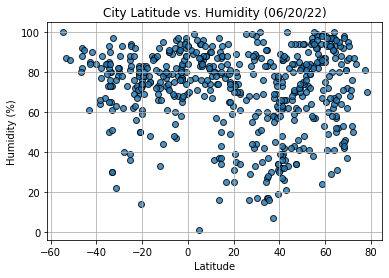

In [44]:
# Build the scatter plots for each city types
plt.scatter(Weather_DF["Latitude"], 
            Weather_DF["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude vs Humidity (%).png")
plt.show()

## Latitude vs. Cloudiness Plot

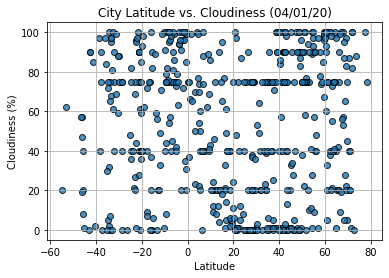

In [12]:
# Build the scatter plots for each city types
plt.scatter(Weather_DF["Latitude"], 
            Weather_DF["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude vs Cloudiness (%).png")
plt.show()

## Latitude vs. Wind Speed Plot

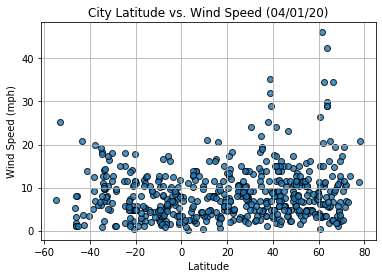

In [13]:
# Build the scatter plots for each city types
plt.scatter(Weather_DF["Latitude"], 
            Weather_DF["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude vs Wind Speed (MPH).png")
plt.show()

## Linear Regression

In [45]:
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [46]:
Northern_DF = Weather_DF.loc[Weather_DF["Latitude"] > 0]
Southern_DF = Weather_DF.loc[Weather_DF["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


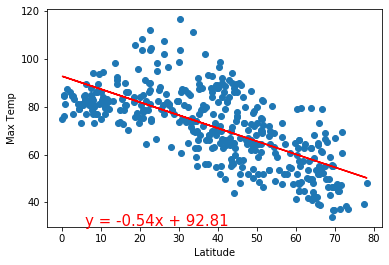

In [25]:
#set the data sets to compare
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Temperature"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Temperature (F)"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Temp on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


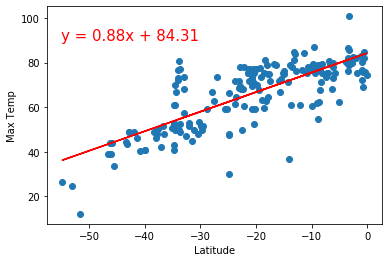

In [26]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Temperature"]
regEQplotX = -25
regEQplotY = 40
y_label = "Temperature (F)"
plt.title(f'Southern Hemisphere Latitude vs Temp on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


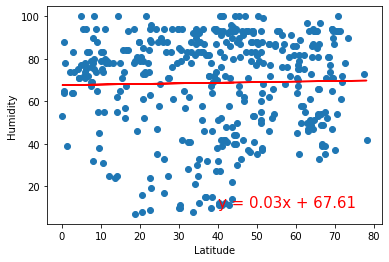

In [27]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Humidity"]
regEQplotX = 45
regEQplotY = 15
y_label = "Humidity (%)"
plt.title(f'Northern Hemisphere Latitude vs Humidity on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Humidity on {runDate}.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


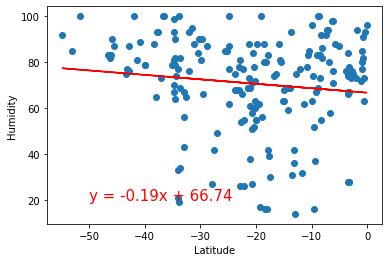

In [28]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Humidity"]
regEQplotX = -55
regEQplotY = 35
y_label = "Humidity (%)"
plt.title(f'Southern Hemisphere Latitude vs Humidity on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Humidity on {runDate}.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


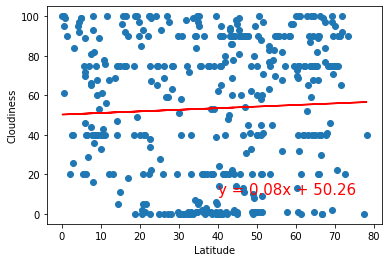

In [29]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Cloudiness"]
regEQplotX = 0
regEQplotY = 25
y_label = "Cloudiness (%)"
plt.title(f'Northern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Cloudiness on {runDate}.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


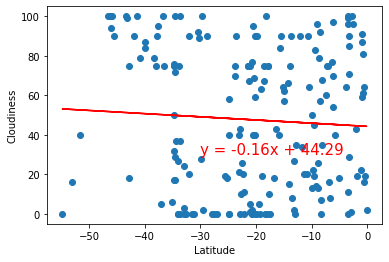

In [30]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Cloudiness"]
regEQplotX = -55
regEQplotY = 60
y_label = "Cloudiness (%)"
plt.title(f'Southern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Cloudiness on {runDate}.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


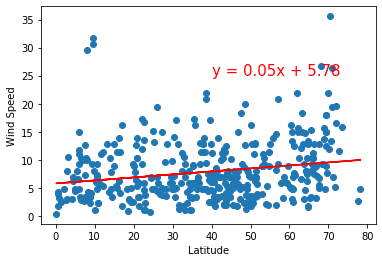

In [31]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Windspeed"]
regEQplotX = 35
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Northern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


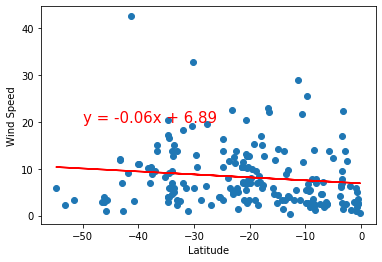

In [32]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Windspeed"]
regEQplotX = -50
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Southern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()